<a href="https://colab.research.google.com/github/ebhawana/retail_product_clustering/blob/main/Retail_Product_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project aims to cluster similar products based on features like price, sales. It then recommendation similar product base on one product code.

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/online_retail_II.csv')

In [ ]:
df.shape

(1067371, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


Invoice
Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.


StockCode
Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.


Description
Product (item) name. Nominal.


Quantity
The quantities of each product (item) per transaction. Numeric.

InvoiceDate
Invoice date and time. Numeric. The day and time when a transaction was generated.


Price
Unit price. Numeric. Product price per unit in sterling (Â£).


Customer ID
Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.


Country
Country name. Nominal. The name of the country

In [ ]:
df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France
1067370,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France


In [ ]:
df.dropna(subset = ['Description','Customer ID'], inplace=True)

In [ ]:
df.isna().sum()

,0
Invoice,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
Price,0
Customer ID,0
Country,0


In [ ]:
df = df[(df['Price']>0) & (df['Quantity']>0)]


In [ ]:
'''from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=100)
desc_features = vectorizer.fit_transform(df['Description']).toarray()
desc_df = pd.DataFrame(desc_features, index=df.index)
df = pd.concat([df, desc_df], axis=1)
df.head()
'''

"from sklearn.feature_extraction.text import TfidfVectorizer\n\nvectorizer = TfidfVectorizer(max_features=100)\ndesc_features = vectorizer.fit_transform(df['Description']).toarray()\ndesc_df = pd.DataFrame(desc_features, index=df.index)\ndf = pd.concat([df, desc_df], axis=1)\ndf.head()\n"

In [ ]:
#Feature Selection
product_df=df.groupby('StockCode').agg({
    'Quantity': 'sum',          # Total quantity sold
    'Price': 'mean',            # Average price
    'Invoice': 'nunique',       # Frequency of transactions
    'Customer ID': 'nunique'    # Number of unique customers
  }).reset_index()

In [ ]:
product_df.shape

(4631, 5)

In [ ]:
product_df.columns = ['Product_Code', 'TotalQuantity', 'AvgPrice(Sterling)', 'SalesFrequency', 'Buyers/Customer']

In [ ]:
product_df

,Product_Code,TotalQuantity,AvgPrice(Sterling),SalesFrequency,Buyers/Customer
0,10002,8624,0.841388,297,164
1,10080,303,0.509259,26,23
2,10109,4,0.420000,1,1
3,10120,664,0.210000,62,52
4,10123C,632,0.624000,46,39
...,...,...,...,...,...
4626,PADS,17,0.001000,17,15
4627,POST,5333,29.749070,1803,405
4628,SP1002,5,2.950000,2,2
4629,TEST001,50,4.500000,9,2


In [ ]:
# Scaling the data
scaler=StandardScaler()
features=['TotalQuantity', 'AvgPrice(Sterling)', 'SalesFrequency', 'Buyers/Customer']
product_df[features]=scaler.fit_transform(product_df[features])

In [ ]:
#using elbow meathod to find optimal cluster value of k
sse=[]
k_rng=range(1,20)
for k in k_rng:
  km= KMeans(n_clusters=k,random_state=42)
  km.fit(product_df[features])
  sse.append(km.inertia_)

sse

[18524.00000000006,
 11158.891963621027,
 8966.177150797273,
 6291.362123205188,
 5064.622704897858,
 4349.164136440031,
 3100.731354946914,
 2840.602944999922,
 2499.2097515333176,
 2214.539063736484,
 1962.3589343496712,
 1760.396684015809,
 1642.2144193044153,
 1573.0888525892371,
 1432.3686104942879,
 1351.4361613853262,
 1252.8108885558206,
 1188.9014919123485,
 1128.6853602403608]

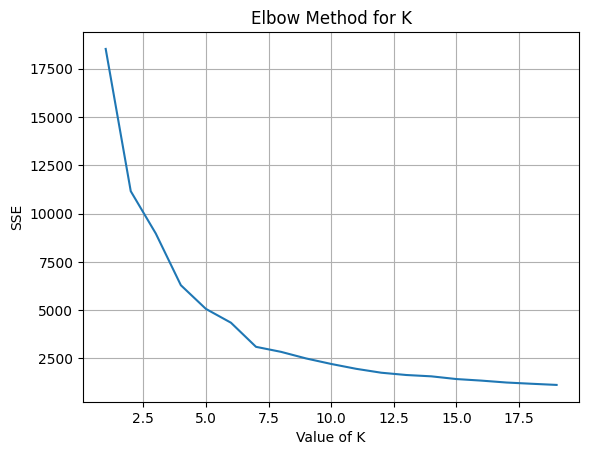

In [ ]:
#plot the graph
plt.plot(k_rng,sse)
plt.xlabel('Value of K')
plt.ylabel('SSE')
plt.title('Elbow Method for K')
plt.grid()
plt.show()
#

As we can see from above graph in between 5-7.5 the value of k is optmal. so we will take k=6

In [ ]:
# n clusters =6
km =KMeans(n_clusters=6,random_state=42)
km_labels=km.fit_predict(product_df[features])
product_df['KM_Cluster']=km_labels

In [ ]:
print("Unique clusters are: ",set(km_labels))

Unique clusters are:  {np.int32(0), np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5)}


In [ ]:
#Applying DBSCAN
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.9,min_samples=5)
dbscan_labels=dbscan.fit_predict(product_df[features])

product_df['DBSCAN_Cluster'] = dbscan_labels

In [ ]:
print("Unique clusters (excluding noise):", set(dbscan_labels))

Unique clusters (excluding noise): {np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(-1)}


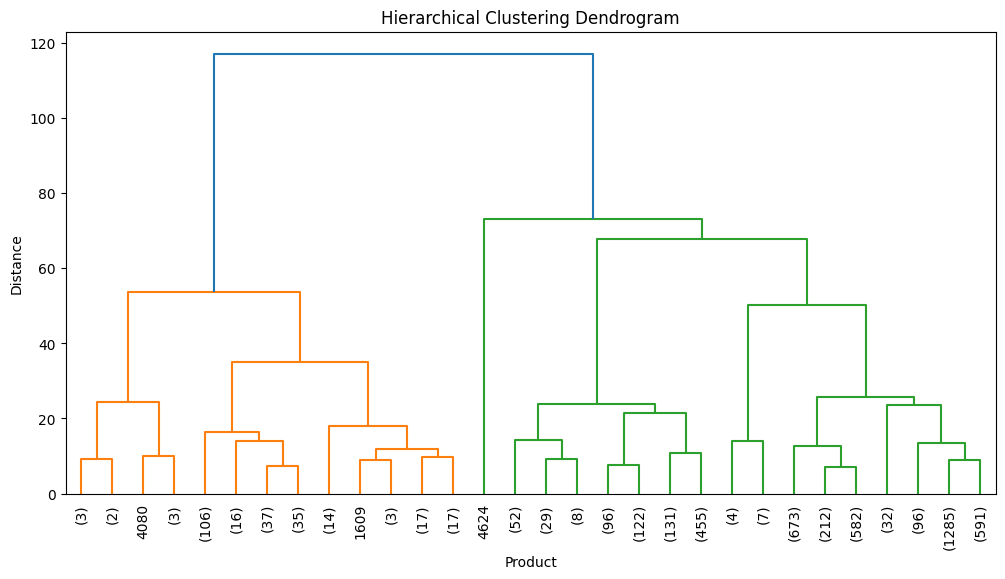

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

#Create linkage matrix
Z = linkage(product_df[features], method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='lastp', p=30, leaf_rotation=90, leaf_font_size=10)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Product")
plt.ylabel("Distance")
plt.show()

In [ ]:
# Decide how many clusters to cut from the dendrogram
hc_labels= fcluster(Z, t=4, criterion='maxclust')
product_df['HC_Cluster'] = hc_labels

In [ ]:
product_df

,Product_Code,TotalQuantity,AvgPrice(Sterling),SalesFrequency,Buyers/Customer,KM_Cluster,DBSCAN_Cluster,HC_Cluster
0,10002,1.091248,-0.220910,0.468403,0.443121,2,0,2
1,10080,-0.347291,-0.244122,-0.500773,-0.599369,1,0,3
2,10109,-0.398982,-0.250361,-0.590180,-0.762027,1,0,3
3,10120,-0.284881,-0.265037,-0.372027,-0.384956,1,0,3
4,10123C,-0.290413,-0.236103,-0.429247,-0.481072,1,0,3
...,...,...,...,...,...,...,...,...
4626,PADS,-0.396735,-0.279644,-0.532960,-0.658517,1,0,3
4627,POST,0.522298,1.799425,5.854302,2.224965,0,-1,1
4628,SP1002,-0.398809,-0.073541,-0.586604,-0.754633,1,0,3
4629,TEST001,-0.391030,0.034787,-0.561570,-0.754633,1,0,3


In [ ]:
#copy of the product_df to avoid modifying the original scaled data
product_df_inverse = product_df.copy()

# Inverse transform the scaled features
product_df_inverse[features] = scaler.inverse_transform(product_df[features])

# Now, product_df_inverse contains the original scale values for the 'features' columns
product_df_inverse

,Product_Code,TotalQuantity,AvgPrice(Sterling),SalesFrequency,Buyers/Customer,KM_Cluster,DBSCAN_Cluster,HC_Cluster
0,10002,8624.0,0.841388,297.0,164.0,2,0,2
1,10080,303.0,0.509259,26.0,23.0,1,0,3
2,10109,4.0,0.420000,1.0,1.0,1,0,3
3,10120,664.0,0.210000,62.0,52.0,1,0,3
4,10123C,632.0,0.624000,46.0,39.0,1,0,3
...,...,...,...,...,...,...,...,...
4626,PADS,17.0,0.001000,17.0,15.0,1,0,3
4627,POST,5333.0,29.749070,1803.0,405.0,0,-1,1
4628,SP1002,5.0,2.950000,2.0,2.0,1,0,3
4629,TEST001,50.0,4.500000,9.0,2.0,1,0,3


In [ ]:
from sklearn.metrics import silhouette_score


km_score = silhouette_score(product_df[features], km_labels)
print(f"K Maeans Silhouette Score: {km_score:.2f}")

db_score = silhouette_score(product_df[features], dbscan_labels)
print(f"DBSCAN Silhouette Score: {db_score:.2f}")

hc_score = silhouette_score(product_df[features], hc_labels)
print(f"Hierarchical Clustering Silhouette Score: {hc_score:.2f}")

K Maeans Silhouette Score: 0.51
DBSCAN Silhouette Score: 0.72
Hierarchical Clustering Silhouette Score: 0.57


In [ ]:
#Analyse the clusters
km_cluster_summary=product_df.groupby('KM_Cluster')[features].mean()
km_cluster_summary

,TotalQuantity,AvgPrice(Sterling),SalesFrequency,Buyers/Customer
KM_Cluster,,,,
0,3.264079,-0.102223,4.119370,3.654729
1,-0.305623,0.025096,-0.444827,-0.520619
2,0.091835,-0.093926,0.254294,0.461037
3,-0.396907,51.728165,-0.536536,-0.762027
4,13.521942,-0.198381,5.880311,4.351617
5,1.000269,-0.044326,1.689121,1.895882


In [ ]:
km_cluster_summary.sort_values(by='TotalQuantity',ascending=False)

,TotalQuantity,AvgPrice(Sterling),SalesFrequency,Buyers/Customer
KM_Cluster,,,,
4,13.521942,-0.198381,5.880311,4.351617
0,3.264079,-0.102223,4.119370,3.654729
5,1.000269,-0.044326,1.689121,1.895882
2,0.091835,-0.093926,0.254294,0.461037
1,-0.305623,0.025096,-0.444827,-0.520619
3,-0.396907,51.728165,-0.536536,-0.762027


clusters of products:


Fast-moving cheap products Cluster 2

Low-demand products Cluster 1



In [ ]:
#Create a mapping: cluster → list of products
cluster_groups = product_df_inverse.groupby('KM_Cluster')['Product_Code']
cluster_groups.apply(list)

#inverse scaling
#multiple algorithm

,Product_Code
KM_Cluster,
0,"[15036, 20685, 20713, 20719, 20724, 20725, 207..."
1,"[10080, 10109, 10120, 10123C, 10123G, 10124A, ..."
2,"[10002, 10133, 10135, 11001, 15034, 15039, 150..."
3,[DOT]
4,"[17003, 21212, 21977, 22197, 23166, 23843, 840..."
5,"[15056BL, 15056N, 16156S, 16161P, 20668, 20675..."


In [ ]:
db_cluster_summary=product_df_inverse.groupby('DBSCAN_Cluster')[features].mean()
db_cluster_summary

,TotalQuantity,AvgPrice(Sterling),SalesFrequency,Buyers/Customer
DBSCAN_Cluster,,,,
-1,33223.389831,35.890147,1269.542373,547.881356
0,1827.768791,3.478130,147.389231,96.727692
1,23173.636364,1.789035,1761.363636,645.454545
2,28.000000,113.138577,21.200000,18.000000
3,29098.166667,1.006205,643.333333,384.333333


In [ ]:
HC_Cluster_summary=product_df_inverse.groupby('HC_Cluster')[features].mean()
HC_Cluster_summary

,TotalQuantity,AvgPrice(Sterling),SalesFrequency,Buyers/Customer
HC_Cluster,,,,
1,16872.109804,2.780700,1049.349020,512.066667
2,4537.643897,2.761891,342.661814,221.716685
3,675.372487,4.197250,56.079265,44.043940
4,16.000000,744.147500,16.000000,1.000000


In [ ]:
db_cluster_summary.sort_values(by='TotalQuantity',ascending=False)

,TotalQuantity,AvgPrice(Sterling),SalesFrequency,Buyers/Customer
DBSCAN_Cluster,,,,
-1,33223.389831,35.890147,1269.542373,547.881356
3,29098.166667,1.006205,643.333333,384.333333
1,23173.636364,1.789035,1761.363636,645.454545
0,1827.768791,3.478130,147.389231,96.727692
2,28.000000,113.138577,21.200000,18.000000


In [ ]:
# prompt: product recommendation usinf kmeans

def get_product_recommendations(product_code, product_df, n_recommendations=5):
  """
    Recommends products from the same KMeans cluster as the given product.

    Args:
      product_code: The code of the product for which to get recommendations.
      product_df: The DataFrame containing product information and KMeans clusters.
      n_recommendations: The number of recommendations to return.

    Returns:
      A list of product codes recommended from the same cluster.
      Returns an empty list if the product code is not found.
    """
  if product_code not in product_df['Product_Code'].values:
    print(f"Product code {product_code} not found.")
    return []

  target_cluster = product_df[product_df['Product_Code'] == product_code]['KM_Cluster'].iloc[0]
  recommended_products = product_df[product_df['KM_Cluster'] == target_cluster]['Product_Code'].tolist()

  # Remove the target product itself from the recommendations
  if product_code in recommended_products:
    recommended_products.remove(product_code)

  # Return the top n_recommendations
  return recommended_products[:n_recommendations]



In [ ]:
recommended_list = get_product_recommendations('85123A', product_df_inverse)
print(f"Recommendations for product '85123A': {recommended_list}")


Recommendations for product '85123A': ['17003', '21212', '21977', '22197', '23166']


In [ ]:
#User Input
product_code_input = input("Enter the product code for recommendations: ")

recommended_list = get_product_recommendations(product_code_input, product_df_inverse)
print(f"Recommendations for product '{product_code_input}': {recommended_list}")

Enter the product code for recommendations: 
Product code  not found.
Recommendations for product '': []
